In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from feature_engine import variable_transformers as vt

# Describe the dataset

In [2]:

print(load_boston()['DESCR'])


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# Define the functions 

In [3]:
#As per linear model assumption all the variables must follow normal distrubution 

def dispnorm(features,dataframe):
    
    for feature in features:
        sns.distplot(dataframe[feature])
        plt.show()
        

#function to plot scatter of dependent and target variable.

def dispscatter(features,tar,dataframe):
    plt.figure(figsize = (8,8))
    for feature in features:
        sns.lmplot(x=feature, y=tar, data=dataframe)
        


# load the the Boston House price data

def load_data():
    boston_dataset = load_boston()
    df = pd.DataFrame(boston_dataset.data,columns=boston_dataset.feature_names)
    df['MEDV'] = boston_dataset.target
    return df


#Variables scaling
def scalar(train,test):
    scalar = StandardScaler()
    scaled_train = scalar.fit_transform(train)
    scaled_test = scalar.transform(test)
    return (scaled_train,scaled_test)
	
#Model performence
def evaluate(test,pred):
    return r2_score(test,pred)
    

#IQR method outlier detection
def outlier_up_low_limit(dataframe,var):
    Q1 = df[var].quantile(.25)
    Q3 = df[var].quantile(.75)
    IQR = Q3-Q1
    uplimit = Q3+(1.5*IQR)
    lowlimit = Q1-(1.5*IQR)
    return (uplimit,lowlimit)
	
#Model fitting
def fit_model(x_train,x_test,y_train,y_test):
    model = LinearRegression()
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    residual = y_test - pred
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    return (pred,residual,train_score,test_score)


#Plots show probobility distrubution, histogram and linear relationship with the target.
def diagnostic_plots(dataframe, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 3, 1)
    dataframe[variable].hist()

    plt.subplot(1, 3, 2)
    stats.probplot(dataframe[variable], dist="norm", plot=plt)
    
    plt.subplot(1, 3, 3)
    plt.scatter(dataframe[variable],df['MEDV'])
    plt.show()


#Residual distrubution
def residual_and_linearity_plot(error,y_pred,y_actual):
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    sns.distplot(error)
    plt.subplot(1,2,2)
    plt.scatter(y_pred,y_actual)

#Residual distrubution with the the variables
def variable_vs_residual(test_data,features,error):
    for index,feature in enumerate(features):
        plt.scatter(x=test_data[:,index],y=error)
        plt.xlabel(feature)
        plt.ylabel('Residual')
        plt.show()

# Load data

In [4]:
df=load_data()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# missing data analysis

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Multi colinearity

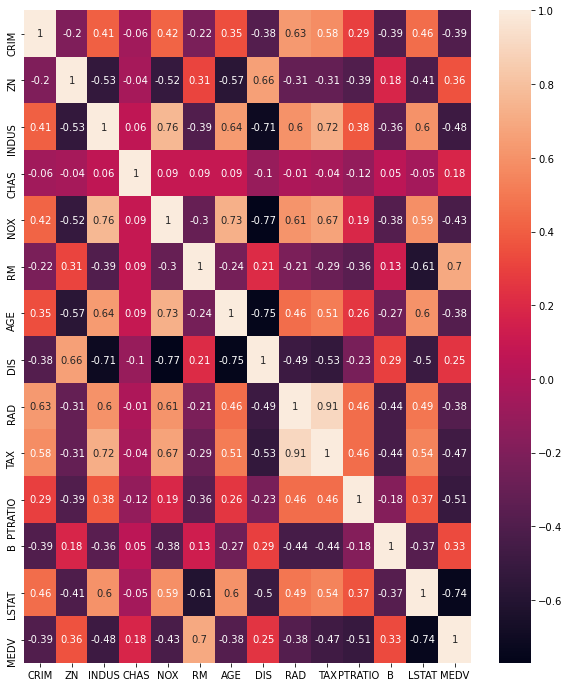

In [6]:
##check multi colinearity
col_matrx = df.corr().round(2)

#analise with heat map
plt.figure(figsize=(10,12))
sns.heatmap(data = col_matrx, annot=True)

# Linear relationship

<Figure size 576x576 with 0 Axes>

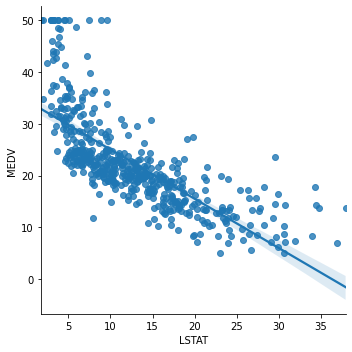

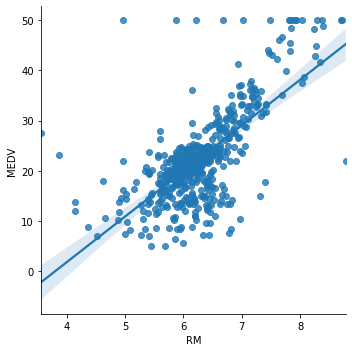

In [7]:
#here LSTAT,RM and PTRATIO are having linear relationship with the target.

features,target = ['LSTAT','RM'],'MEDV'
dispscatter(features,target,df)

# Normality

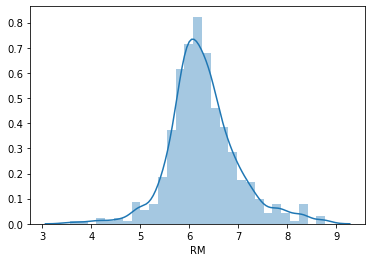

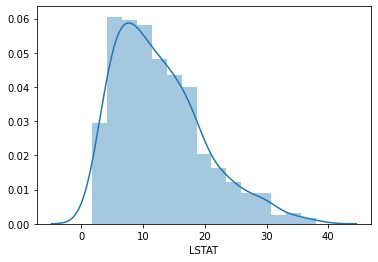

In [492]:
#Normality is to check whether the data is normally distrubuted or skewed.

dispnorm(features,df)

# Transformation

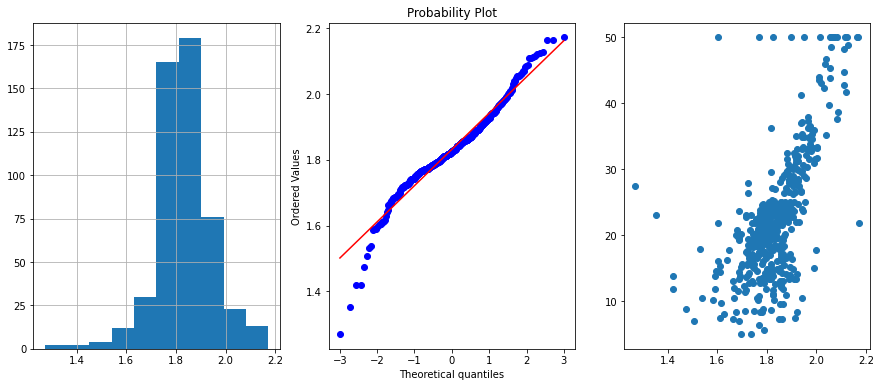

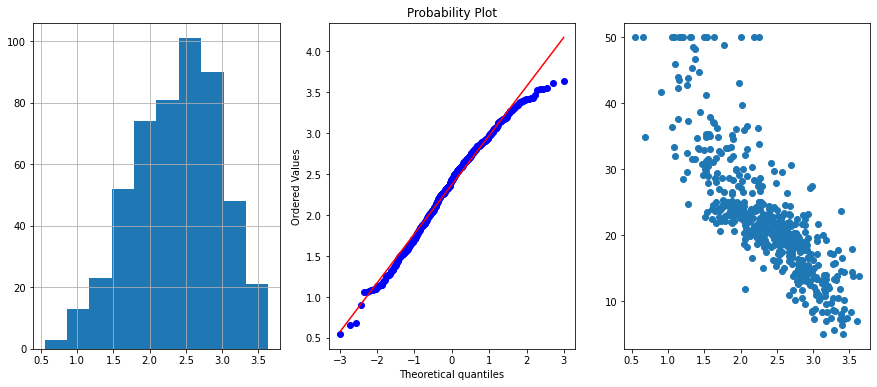

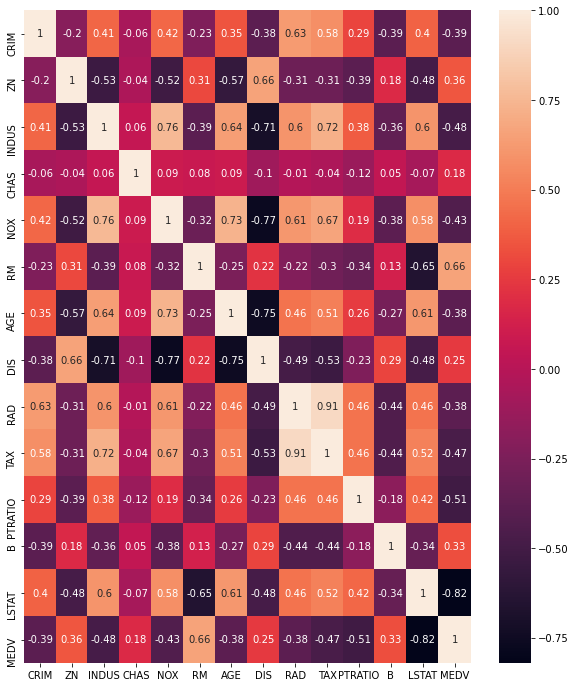

In [516]:
df = load_data()
#np.log(df['RM'])
#np.log(df['LSTAT'])
lt = vt.LogTransformer(variables = ['RM', 'LSTAT'])
lt.fit(df)
df = lt.transform(df)
for var in ['RM','LSTAT']:
    diagnostic_plots(df,var)

#analise with heat map
plt.figure(figsize=(10,12))
sns.heatmap(data = df.corr().round(2), annot=True)

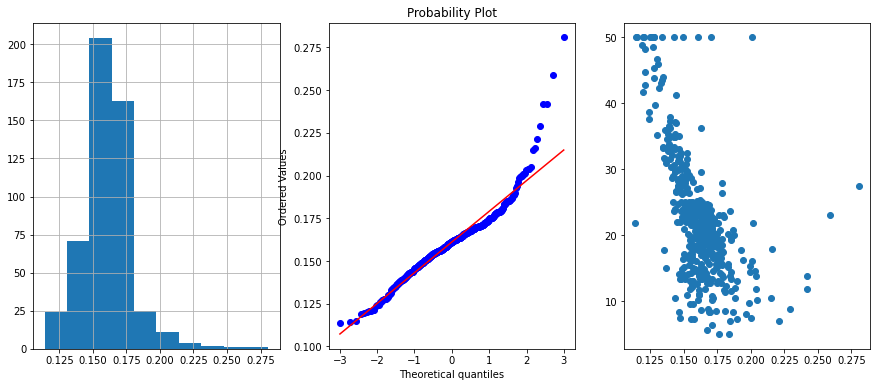

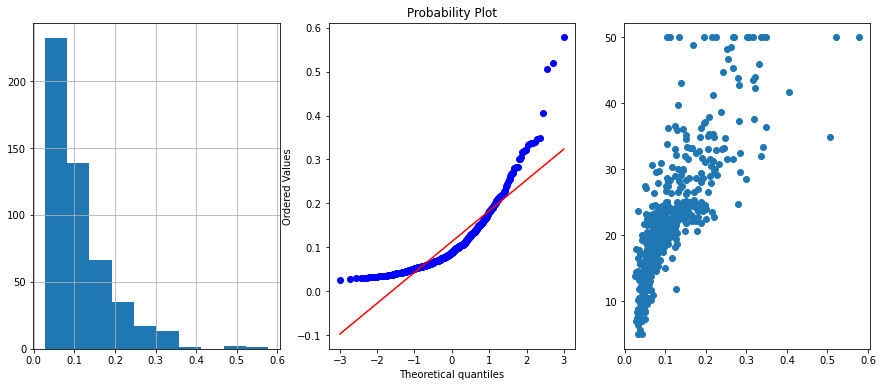

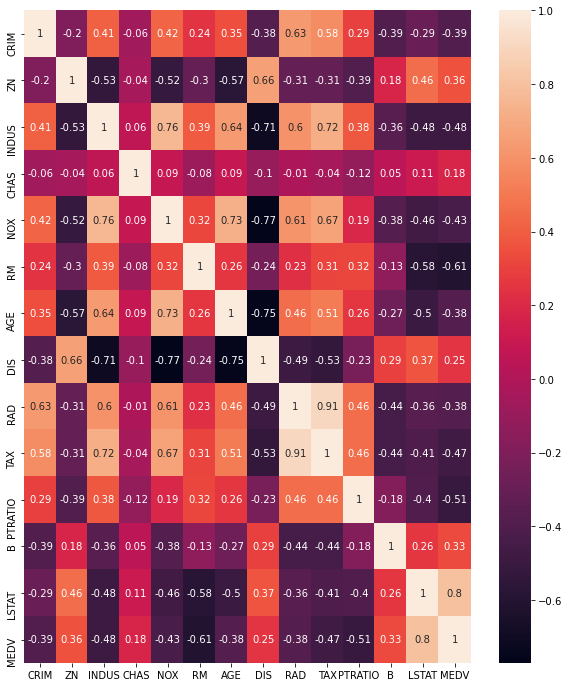

In [517]:
df = load_data()
lt = vt.ReciprocalTransformer(variables = ['RM', 'LSTAT'])
lt.fit(df)
df = lt.transform(df)
for var in ['RM','LSTAT']:
    diagnostic_plots(df,var)


plt.figure(figsize=(10,12))
sns.heatmap(data = df.corr().round(2), annot=True)

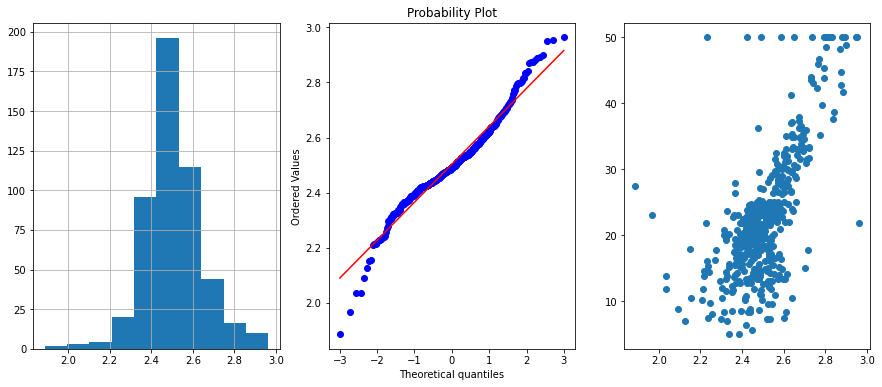

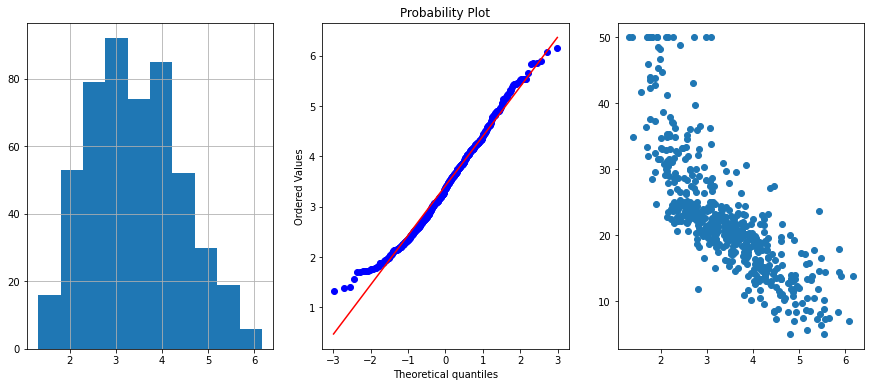

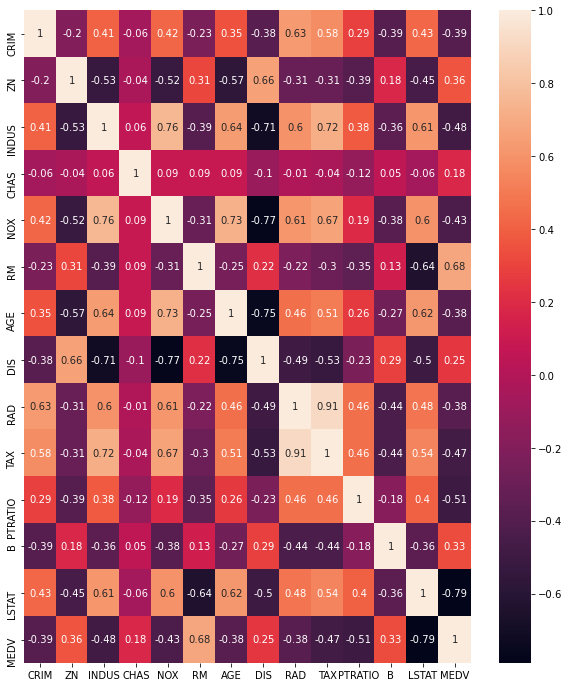

In [370]:
df = load_data()
lt = vt.PowerTransformer(variables = ['RM', 'LSTAT'])
lt.fit(df)
df = lt.transform(df)
for var in ['RM','LSTAT']:
    diagnostic_plots(df,var)
    

plt.figure(figsize=(10,12))
sns.heatmap(data = df.corr().round(2), annot=True)


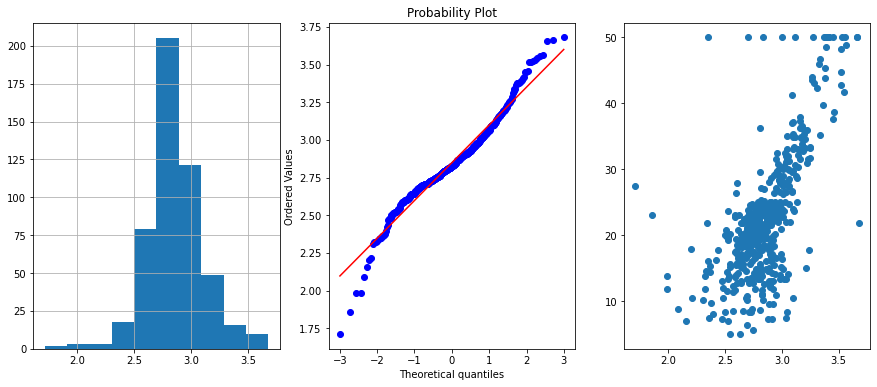

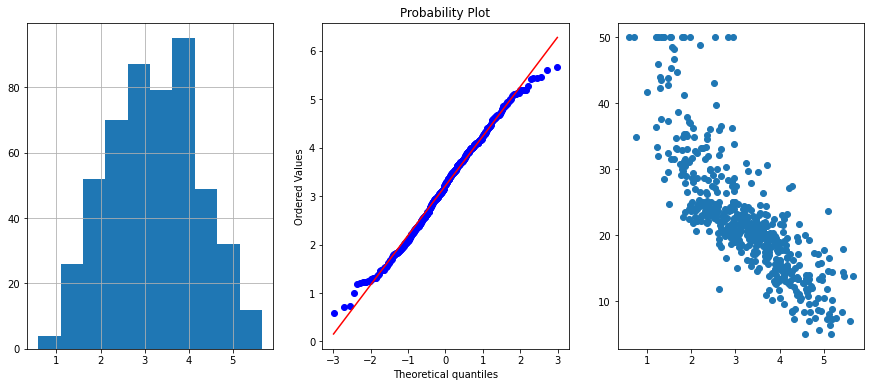

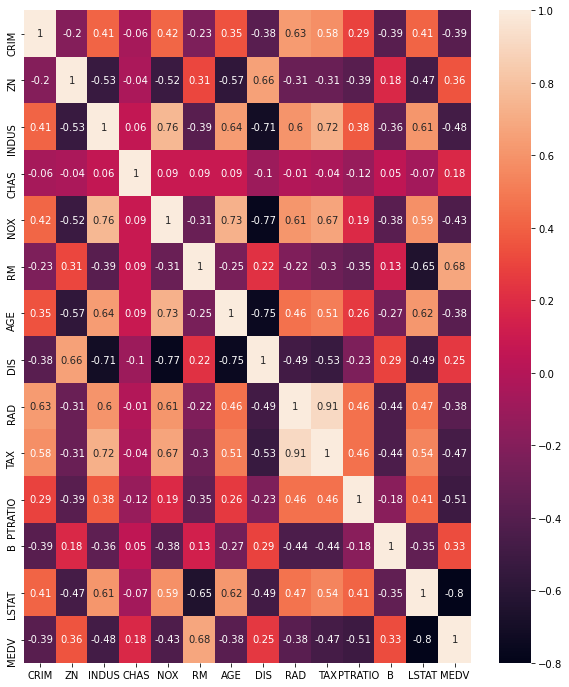

In [371]:
df = load_data()
lt = vt.BoxCoxTransformer(variables = ['RM', 'LSTAT'])
lt.fit(df)
df = lt.transform(df)
for var in ['RM','LSTAT']:
    diagnostic_plots(df,var)
    

plt.figure(figsize=(10,12))
sns.heatmap(data = df.corr().round(2), annot=True)


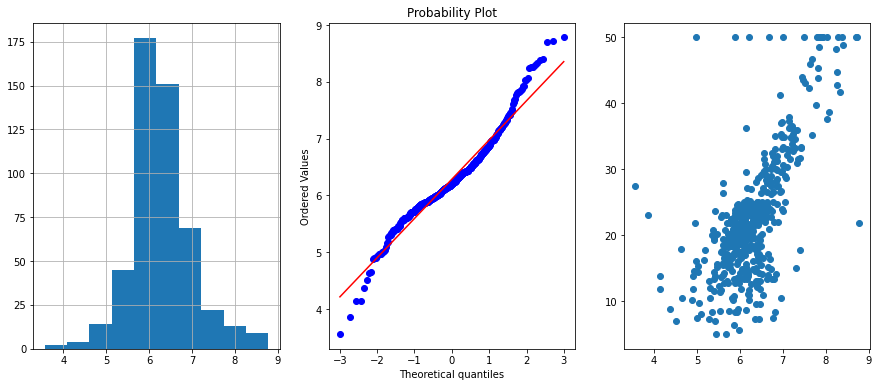

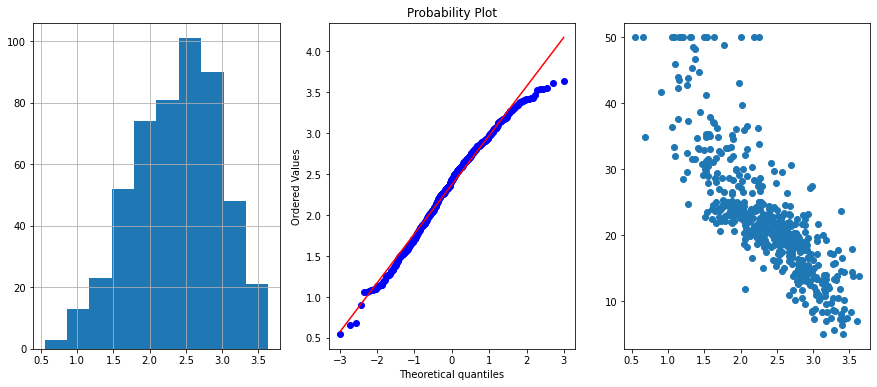

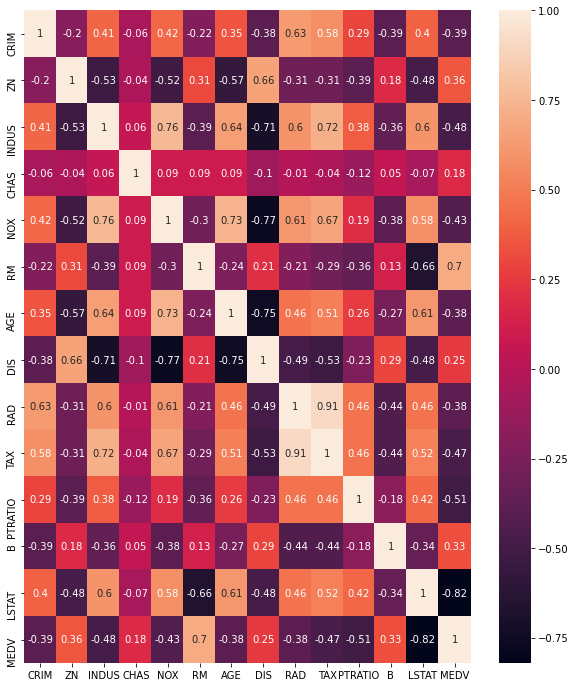

In [518]:
#I have applied LOG transformation oly on LSTAT since the RM's colinearity tend to decrease with the transformation.

df = load_data()
lt = vt.LogTransformer(variables = ['LSTAT'])
lt.fit(df)
df = lt.transform(df)
for var in ['RM','LSTAT']:
    diagnostic_plots(df,var)
    

plt.figure(figsize=(10,12))
sns.heatmap(data = df.corr().round(2), annot=True)


# Model fitting

In [519]:
#select the features for splitting
features = ['RM','LSTAT']
target = 'MEDV'

X = df[features].values
y= df[target].values

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#variables scaling
s_train,s_test=scalar(X_train, X_test)

#model fit
pred,residual,train_score,test_score = fit_model(s_train,s_test, y_train, y_test)
print(train_score,test_score)


0.712246803045915 0.6752479317604024


In [520]:
preddf = pd.DataFrame({'actual':y_test,'pred':pred})
preddf

,actual,pred
0,23.6,24.634699
1,32.4,34.916371
2,13.6,16.348135
3,22.8,27.937330
4,16.1,18.016074
...,...,...
97,17.9,4.898958
98,9.6,18.242877
99,17.2,17.478381
100,22.5,19.705565


# Residual and plot of prediction vs acutal

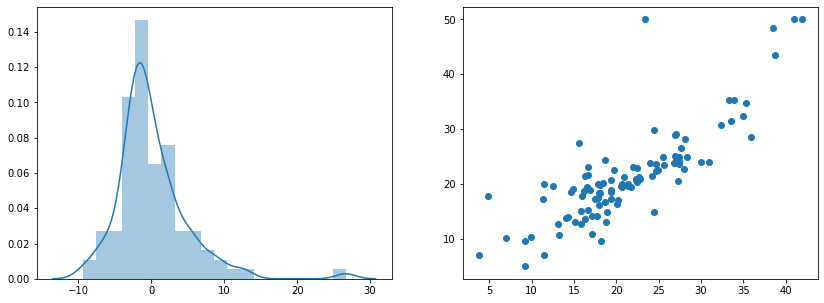

In [521]:
residual_and_linearity_plot(residual,pred,y_test)

# homocedanicity

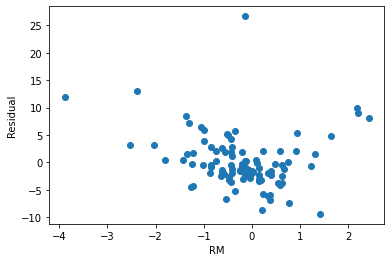

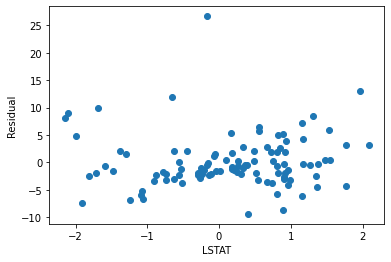

In [522]:
#it's the measure of distrubution of errros or residuals (error = y_test-y_predict)
#if the residuals are disturbuted unifromly across the variable valuees then it's homoscedastic.
#we can check this with residual plot.
#In order to do this we need to build a model first.

variable_vs_residual(s_test,features,residual)